<h1><div style="text-align: center"> Phish Detector </div></h1> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import arff

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import tensorflow as tf

%matplotlib inline

In [2]:
data, meta = arff.loadarff("phishingdataset.arff")

In [3]:
# Data Preprocessing

data = pd.DataFrame(data)
data = data.astype(str)
r = {"b'1'": '1', "b'-1'": '-1', "b'0'": '0'}
data = data.replace(r)
data = data.astype(int)

In [4]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
X = data.iloc[:,:-1] # features
y = data.iloc[:,-1]  # class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train = (7406, 30), X_test = (3649, 30)

In [6]:
# Model Selection 1 (Basic classifiers)

# (1) Decision Trees

dt0 = tree.DecisionTreeClassifier()
dt0.fit(X_train, y_train)
print("Decision tree :", dt0.score(X_test, y_test))

dt1 = tree.DecisionTreeClassifier(min_samples_leaf=4)
dt1.fit(X_train, y_train)
print("Decision tree, min_samples_leaf = 4 :", dt1.score(X_test, y_test))

dt2 = tree.DecisionTreeClassifier(min_samples_leaf=6)
dt2.fit(X_train, y_train)
print("Decision tree, min_samples_leaf = 6 :", dt2.score(X_test, y_test))
print()


# (2) KNN

knn0 = KNeighborsClassifier(n_neighbors = 18)
knn0.fit(X_train, y_train)
print("KNN, K=18 :", knn0.score(X_test, y_test))

knn1 = KNeighborsClassifier(n_neighbors = 25)
knn1.fit(X_train, y_train)
print("KNN, K=25 :", knn1.score(X_test, y_test))
print()


# (3) MLP

mlp0 = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp0.fit(X_train, y_train)
print("MLP, (15, 15) :", mlp0.score(X_test, y_test))

mlp1 = MLPClassifier(hidden_layer_sizes=(15, 15, 15))
mlp1.fit(X_train, y_train)
print("MLP, (15, 15, 15) :", mlp1.score(X_test, y_test))

mlp2 = MLPClassifier(hidden_layer_sizes=(20, 20))
mlp2.fit(X_train, y_train)
print("MLP, (20, 20) :", mlp2.score(X_test, y_test))

mlp3 = MLPClassifier(hidden_layer_sizes=(30, 30))
mlp3.fit(X_train, y_train)
print("MLP, (30, 30) :", mlp3.score(X_test, y_test))
print()


# (4) SVM
svc0 = SVC()
svc0.fit(X_train, y_train)
print("SVM :", svc0.score(X_test, y_test))
print()


# (5) Neural Network
onehoty_train = pd.get_dummies(y_train, prefix='Result', columns=['Result'])
onehoty_test = pd.get_dummies(y_test, prefix='Result', columns=['Result'])

n_nodes_input = 30 # number of input features
n_nodes_hl = 30     # number of units in a hidden layer
n_classes = 2       # classes
a = tf.placeholder('float', [None, 30])
b = tf.placeholder('float')

def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer['weights']), hidden_layer['biases'])
    l1 = tf.nn.sigmoid(l1)
    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(a):
    prediction = neural_network_model(a)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=b,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {a: X_train, b: onehoty_train})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print('Epoch', epoch, 'completed out of', 1000, 'Training loss:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(b,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {a: X_train, b: onehoty_train}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {a: X_test, b: onehoty_test}))
    
train_neural_network(a)

Decision tree : 0.9542340367223897
Decision tree, min_samples_leaf = 4 : 0.935050698821595
Decision tree, min_samples_leaf = 6 : 0.9413537955604275

KNN, K=18 : 0.9139490271307208
KNN, K=25 : 0.9114825979720471

MLP, (15, 15) : 0.9438202247191011
MLP, (15, 15, 15) : 0.9460126061934777
MLP, (20, 20) : 0.9462866538777748
MLP, (30, 30) : 0.9446423677719923

SVM : 0.9410797478761305

Epoch 100 completed out of 1000 Training loss: 0.5461989045143127
Epoch 200 completed out of 1000 Training loss: 0.39621174335479736
Epoch 300 completed out of 1000 Training loss: 0.2968277037143707
Epoch 400 completed out of 1000 Training loss: 0.2443326711654663
Epoch 500 completed out of 1000 Training loss: 0.2171860635280609
Epoch 600 completed out of 1000 Training loss: 0.20236192643642426
Epoch 700 completed out of 1000 Training loss: 0.19356784224510193
Epoch 800 completed out of 1000 Training loss: 0.18776074051856995
Epoch 900 completed out of 1000 Training loss: 0.18350012600421906
Train set Accuracy

In [7]:
# Prediction examples using KNN
print(knn0.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))
print(knn0.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[1]
[-1]


In [8]:
# Model Selection 2 (Ensemble)

# (1) RandomForest

RFclf0 = RandomForestClassifier()
RFclf0.fit(X_train, y_train)
print("RandomForest :", RFclf0.score(X_test, y_test))

'''x_range = range(10, 25)
scores2 = []
for x in x_range:
    RFclf1 = RandomForestClassifier(n_estimators = x)
    RFclf1.fit(X_train, y_train)
    scores2.append(RFclf1.score(X_test, y_test))

plt.plot(x_range, scores2)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Testing Accuracy')'''

RFclf1 = RandomForestClassifier(n_estimators = 20)
RFclf1.fit(X_train, y_train)
print("RandomForest, n_estimators=20 :", RFclf1.score(X_test, y_test))
print()
      
    
# (2) Bagging
      
bag0 = BaggingClassifier()
bag0.fit(X_train, y_train)
print("Bagging :", bag0.score(X_test, y_test))
      
bag1 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3))
bag1.fit(X_train, y_train)
print("Bagging, base_estimator=KNN(k=3) :", bag1.score(X_test, y_test))
      
bag2 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=28))
bag2.fit(X_train, y_train)
print("Bagging, base_estimator=KNN(k=28) :", bag2.score(X_test, y_test))
print()
      
    
# (3) AdaBoost
      
ABclf0 = AdaBoostClassifier() #n_estimators=50, learning_rate = 1
ABclf0.fit(X_train, y_train)
print("AdaBoost :", ABclf0.score(X_test, y_test))
      
ABclf1 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5)
ABclf1.fit(X_train, y_train)
print("AdaBoost, n_estimators=200, learning_rate=0.5 :", ABclf1.score(X_test, y_test))
      
ABclf2 = AdaBoostClassifier(n_estimators=400, learning_rate = 0.5)
ABclf2.fit(X_train, y_train)
print("AdaBoost, n_estimators=400, learning_rate=0.5 :", ABclf2.score(X_test, y_test))
print()


# (4) Voting
voteclf1 = VotingClassifier(
    estimators=[('dt0', tree.DecisionTreeClassifier()), 
                ('mlp3', MLPClassifier(hidden_layer_sizes=(30, 30))),
                ('RFclf2', RandomForestClassifier(n_estimators = 10)),
                ('bag0', BaggingClassifier())], 
    voting='soft')
voteclf1.fit(X_train, y_train)
print("Voting, DT & MLP & RF & BAGGING :", voteclf1.score(X_test, y_test))

RandomForest : 0.9646478487256782
RandomForest, n_estimators=20 : 0.9668402302000548

Bagging : 0.9632776103041929
Bagging, base_estimator=KNN(k=3) : 0.9438202247191011
Bagging, base_estimator=KNN(k=28) : 0.9125787887092354

AdaBoost : 0.9394354617703481
AdaBoost, n_estimators=200, learning_rate=0.5 : 0.9377911756645656
AdaBoost, n_estimators=400, learning_rate=0.5 : 0.9369690326116744

Voting, DT & MLP & RF & BAGGING : 0.9646478487256782


C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


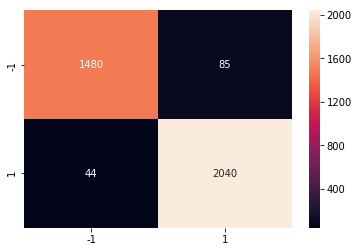

In [9]:
cm = confusion_matrix(y_test, voteclf1.predict(X_test), labels = [-1, 1])
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = [-1, 1], yticklabels = [-1, 1])